In [1]:
import keras
import tensorflow as tf
import numpy as np
from i3d_inception import *
from keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Activation, Dense, Dropout, ZeroPadding2D)
from keras.models import load_model, Model, Sequential
from utils import *

Using TensorFlow backend.

Bad key "text.kerning_factor" on line 4 in
c:\users\kentw\appdata\local\continuum\anaconda3\envs\keras-kinetics-i3d\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import keras.backend as K

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

from keras.backend.tensorflow_backend import set_session
from keras.backend.tensorflow_backend import clear_session
from keras.backend.tensorflow_backend import get_session

In [3]:
# 1. Filter/Kernal Visualization 
# 2. Feature Map Visualization
# 3. Heat Map / Class activation maps CAM
# 4. Deconvolution / Activation Maximization
# 5. Concatenated Feature Map


In [4]:
### Pre-fit Model

In [5]:
weights = "models\exp5_lr0.01_batchs1_batchnormFalse_w0_1_train_nn_rgb_imagenet_and_kinetics_MAA_fold_5.h5"
dropout_prob = 0

# Input dimensions
NUM_FRAMES = 64
FRAME_HEIGHT = 224
FRAME_WIDTH = 224
NUM_RGB_CHANNELS = 3
NUM_CLASSES = 2

# # load the model
# model = Inception_Inflated3d(
#         include_top=True ,
#         weights=weights,
#         input_shape=(NUM_FRAMES, FRAME_HEIGHT, FRAME_WIDTH, NUM_RGB_CHANNELS),
#         classes=NUM_CLASSES)

model = build_model()
model = load_model(weights)

# summarize the model
model.summary()









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\kentw\OneDrive - University of Toronto\PycharmProjects\keras-kinetics-i3d\utils.py:208: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  return Model(input=model.input, output=x)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 224, 224, 0                                            
__________________________________________________________________________________________________
Conv3d_1a_7x7_conv (Conv3D)     (None, 32, 112, 112, 65856       input_1[0][0]                    
__________________________________________________________________________________________________
Conv3d_1a_7x7_bn (BatchNormaliz (None, 32, 112, 112, 192         Conv3d_1a_7x7_conv[0][0]         
__________________________________________________________________________________________________
Conv3d_1a_7x7 (Activation)      (None, 32, 112, 112, 0           Conv3d_1a_7x7_bn[0][0]           
___________

In [6]:
### How to Visualize Filters. Compare this result with Pre-trained weight

c:\users\kentw\appdata\local\continuum\anaconda3\envs\keras-kinetics-i3d\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


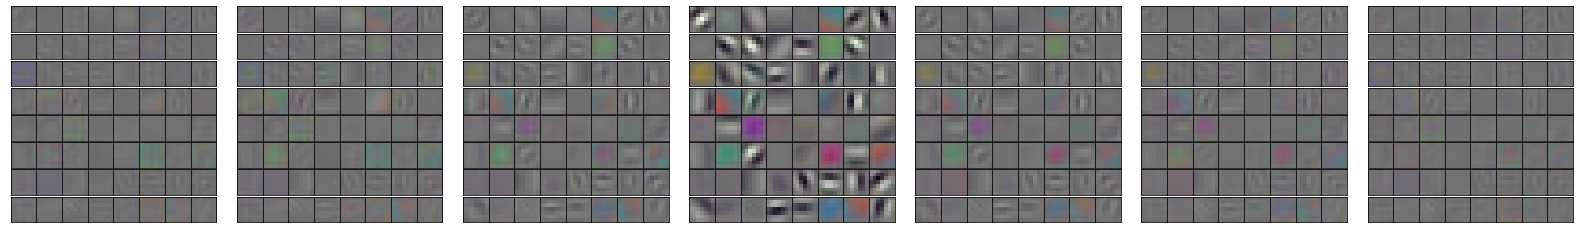

In [7]:
# # summarize filter shapes
# for layer in model.layers:
#     # check for convolutional layer
#     if 'conv' not in layer.name:
#         continue
#     # get filter weights
#     filters = np.asarray(layer.get_weights()[0])
#     print(layer.name, filters.shape)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# retrieve weights from the second hidden layer
filters = np.asarray(model.layers[1].get_weights()[0])
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

fig = plt.figure(figsize=(28, 4))
outer = gridspec.GridSpec(1, 7, wspace=0.1, hspace=0.1)

for i in range(7):
    inner = gridspec.GridSpecFromSubplotSpec(8, 8,
                    subplot_spec=outer[i], wspace=0, hspace=0.0)
    for j in range(64):
        ax = plt.Subplot(fig, inner[j])
        t = ax.imshow(filters[i, :, :, :, j])
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
fig.show()

In [8]:
### How to Visualize feature maps 

In [9]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 Conv3d_1a_7x7_conv (?, 32, 112, 112, 64)
5 Conv3d_2b_1x1_conv (?, 32, 56, 56, 64)
8 Conv3d_2c_3x3_conv (?, 32, 56, 56, 192)
12 Conv3d_3b_1a_1x1_conv (?, 32, 28, 28, 96)
13 Conv3d_3b_2a_1x1_conv (?, 32, 28, 28, 16)
19 Conv3d_3b_0a_1x1_conv (?, 32, 28, 28, 64)
20 Conv3d_3b_1b_3x3_conv (?, 32, 28, 28, 128)
21 Conv3d_3b_2b_3x3_conv (?, 32, 28, 28, 32)
22 Conv3d_3b_3b_1x1_conv (?, 32, 28, 28, 32)
32 Conv3d_3c_1a_1x1_conv (?, 32, 28, 28, 128)
33 Conv3d_3c_2a_1x1_conv (?, 32, 28, 28, 32)
39 Conv3d_3c_0a_1x1_conv (?, 32, 28, 28, 128)
40 Conv3d_3c_1b_3x3_conv (?, 32, 28, 28, 192)
41 Conv3d_3c_2b_3x3_conv (?, 32, 28, 28, 96)
42 Conv3d_3c_3b_1x1_conv (?, 32, 28, 28, 64)
53 Conv3d_4b_1a_1x1_conv (?, 16, 14, 14, 96)
54 Conv3d_4b_2a_1x1_conv (?, 16, 14, 14, 16)
60 Conv3d_4b_0a_1x1_conv (?, 16, 14, 14, 192)
61 Conv3d_4b_1b_3x3_conv (?, 16, 14, 14, 208)
62 Conv3d_4b_2b_3x3_conv (?, 16, 14, 14, 48)
63 Conv3d_4b_3b_1x1_conv (?, 16, 14, 14, 64)
73 Conv3d_4c_1a_1x1_conv (?, 16, 14, 14, 112)
74 Conv3d_4c

(1, 16, 14, 14, 64)


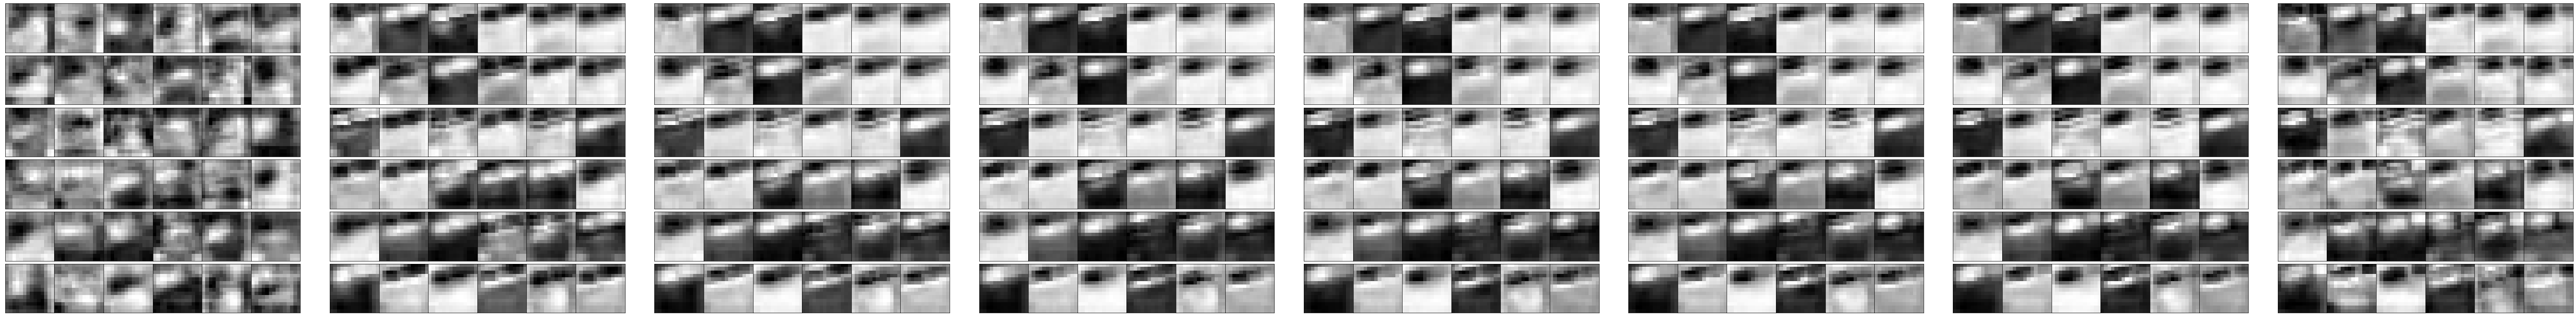

In [15]:
from keras.models import Model

# redefine model to output right after the first hidden layer
# ixs = [1, 8, 42, 63, 83, 123, 143, 164, 184]
# ixs = [1, 8, 42, 123, 184]
ixs = [123]

outputs = [model.layers[i].output for i in ixs]
conv_model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
vid= np.load(r"C:\Users\kentw\OneDrive - University of Toronto\PycharmProjects\Fall-Detection-with-CNNs-and-Optical-Flow\MAA\Pass_split1\idapt372_sub207_UP_11-09-20.npy")
vid = np.load(r"C:\Users\kentw\OneDrive - University of Toronto\PycharmProjects\Fall-Detection-with-CNNs-and-Optical-Flow\MAA\Hazardous_slips\idapt372_sub207_UF_11-15-28.npy")
# expand dimensions so that it represents a single 'sample'
vid = np.expand_dims(vid, axis=0)

# get feature map for first hidden layer
feature_maps = conv_model.predict(vid)
print(feature_maps.shape)

fig = plt.figure(figsize=(96,12))
outer = gridspec.GridSpec(1, 8, wspace=0.1, hspace=0.1)

for i in range(8):
    inner = gridspec.GridSpecFromSubplotSpec(6, 6,
                    subplot_spec=outer[i], wspace=0, hspace=0)
    # plot all 64 maps in an 8x8 squares
    for j in range(36):
        ax = plt.Subplot(fig, inner[j])
        ax.imshow(feature_maps[0, 2*i, :, :, j], cmap='gray') 
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        
# show the figure
plt.show()